
# CH04_NumPy 基础：数组和矢量计算

数值计算的基础包
NumPy的部分功能如下：
* ndarray，一个具有矢量算术运算和复杂广播能力的快速且节省空间的多维数组。
* 用于对整组数据进行快速运算的标准数学函数（无需编写循环） 。
* 用于读写磁盘数据的工具以及用于操作内存映射文件的工具。
* 线性代数、随机数生成以及傅里叶变换功能。
* 用于集成由C、C++、Fortran等语言编写的代码的A C API。

对于大部分数据分析应用而言，我最关注的功能主要集中在：
* 用于数据整理和清理、子集构造和过滤、转换等快速的矢量化数组运算。
* 常用的数组算法，如排序、唯一化、集合运算等。
* 高效的描述统计和数据聚合/摘要运算。
* 用于异构数据集的合并/连接运算的数据对齐和关系型数据运算。
* 将条件逻辑表述为数组表达式（而不是带有if-elif-else分支的循环） 。
* 数据的分组运算（聚合、转换、函数应用等）。

可能使用pandas更多但是底层还是Numpy

看看array和python自带的list效率差异，要比存python快10-100倍，而且内存使用更少

In [3]:
import numpy as np

my_arr = np.arange(10000000)
my_list = list(range(10000000))

In [4]:
%time for _ in range(10): my_arr2 = my_arr * 2
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 121 ms, sys: 117 ms, total: 238 ms
Wall time: 235 ms
CPU times: user 3.31 s, sys: 821 ms, total: 4.13 s
Wall time: 4.13 s


### 4.1 NumPy的ndarray：一种多维数组对象
矩阵运算的基础

In [5]:
# 2行3列的随机矩阵
data=np.random.randn(2,3)
data

array([[ 0.92725644, -1.28474946, -0.90533497],
       [ 0.1789937 , -1.50695427,  0.55153598]])

In [6]:
data*10

array([[  9.27256436, -12.8474946 ,  -9.05334966],
       [  1.78993696, -15.06954273,   5.51535977]])

In [7]:
data+data

array([[ 1.85451287, -2.56949892, -1.81066993],
       [ 0.35798739, -3.01390855,  1.10307195]])

In [8]:
# 查看维度
data.shape


(2, 3)

创建array

In [10]:
data1 = [6, 7.5, 8, 0, 1]
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]

In [14]:
arr1=np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [15]:
arr2=np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [17]:
#查看维度，跟shape差不多用法
arr2.ndim

2

别的常用的zeros() ones() empty()

In [18]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
#是（（2,3））不是（2,3）
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [21]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [22]:
#arange是Python内置函数range的数组版：
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

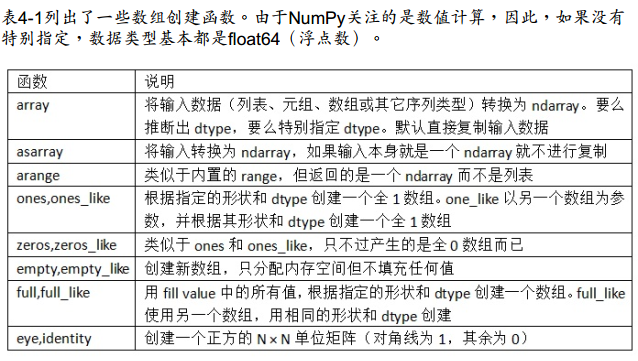

* ndarray的数据类型

dtype（数据类型） 是一个特殊的对象，它含有ndarray将一块内存解释为特定数据
类型所需的信息：

In [24]:
arr1=np.array([1,2,3],dtype=np.int32)

In [25]:
arr1.dtype

dtype('int32')

类型转换

In [27]:
arr2=arr1.astype(np.float64)
arr2.dtype

dtype('float64')

* NumPy数组的运算

矢量化（vectorization）不用编写循环即可对数据执行批量运算,而且效率更高效
+-*/都支持，也支持与常量的计算，会遍历与每个常量运算

In [28]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])

In [29]:
arr*arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [33]:
arr1=(arr-arr*arr)/arr

In [32]:
arr*5

array([[ 5., 10., 15.],
       [20., 25., 30.]])

In [ ]:
#支持布尔运算


In [34]:
arr1>arr

array([[False, False, False],
       [False, False, False]])

不同大小的数组之间的运算叫做广播（broadcasting）,高级技能，数据分析较少用到

* 基本的索引和切片

一维的情况跟python列表一样

In [37]:
arr=np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [38]:
arr[5]

5

In [39]:
arr[2:7]

array([2, 3, 4, 5, 6])

In [40]:
arr[:-4]

array([0, 1, 2, 3, 4, 5])

In [41]:
arr[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [45]:
arr[2:6]=999
arr

array([  0,   1, 999, 999, 999, 999,   6,   7,   8,   9])

和列表的区别在于任何对切片的操作最后都会影响原数组，因为numpy就是为处理大数据而生的，如果复制数组的话将会产生性能问题

如果你想要得到的是ndarray切片的一份副本而非视图，就需要明确地进行复制操作，例如 arr[5:8].copy() 

In [52]:
temp=arr[3:7]
#注意这波操作，会改变原数组
temp[:]=123456
arr


array([     0,      1,    999, 123456, 123456, 123456, 123456,      7,
            8,      9])

对于高维度数组，能做的事情更多。在一个二维数组中，各索引位置上的元素不再
是标量而是一维数组：


In [53]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [56]:
#下面两个访问是等价的
arr2d[2][2]
arr2d[2,2]

9

轴0作为行，轴1作为列
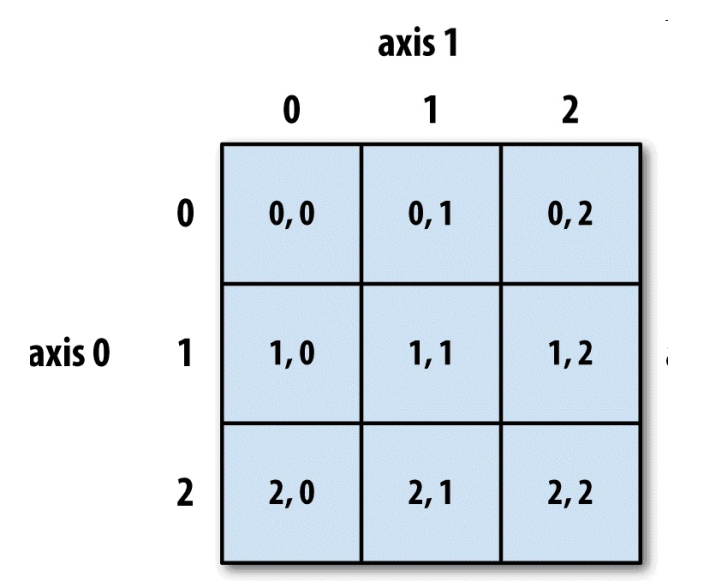


In [57]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [
10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [58]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [60]:
arr3d[0]=0
arr3d

array([[[ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [62]:
arr3d[0][1]=4
arr3d

array([[[ 0,  0,  0],
        [ 4,  4,  4]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

所有的切片返回的都是视图，也就是改变后都会改变原数组

对应二维数组来说，切片是沿着0轴，返回的是行

In [65]:
arr2d[1:]

array([[4, 5, 6],
       [7, 8, 9]])

In [69]:
#多维度的切片 ，可以进行降维
arr2d[1:,:-1]

array([[4, 5],
       [7, 8]])

In [70]:
arr2d[2]

array([7, 8, 9])

In [71]:
arr2d[2,:]

array([7, 8, 9])

In [72]:
arr2d[2:,:]

array([[7, 8, 9]])

In [73]:
arr2d[1:2,:2]

array([[4, 5]])

注意如果一个带：就是一维，两带冒号就是2维
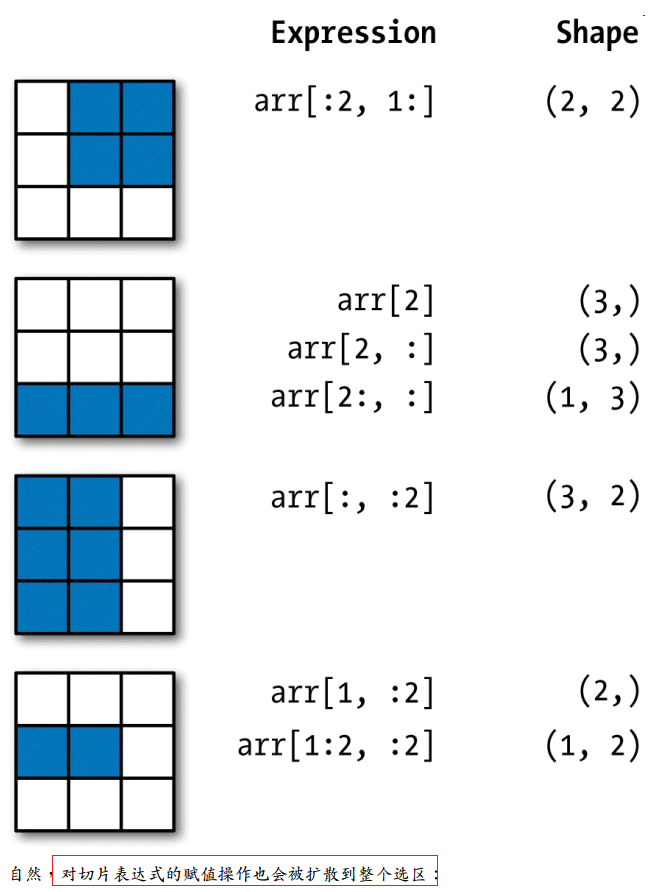

bool索引

In [78]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will',
'Joe', 'Joe'])
data=np.random.randn(7,4)
data

array([[-0.69358549,  0.76183358,  0.55079213, -1.71711454],
       [ 0.04853813,  0.26532521, -0.09155543, -0.32755536],
       [-0.09916762,  0.83636128, -0.56107391,  1.41000877],
       [-0.09936518, -0.72837957, -0.4192433 ,  1.8997433 ],
       [ 0.36031242, -1.67290704,  1.25706803,  0.94061106],
       [ 0.66468117,  0.6537468 ,  1.63227877, -0.09885759],
       [-0.2737975 ,  0.60532585, -0.69839515, -0.05556847]])

In [79]:
#必须要求names的长度要跟索引的行数是一样的
data[names=='Will']

array([[-0.09916762,  0.83636128, -0.56107391,  1.41000877],
       [ 0.36031242, -1.67290704,  1.25706803,  0.94061106]])

布尔型也可以和切片和整数混合使用

In [81]:
#~反转条件
data[~(names=='Will'),:-2]

array([[-0.69358549,  0.76183358],
       [ 0.04853813,  0.26532521],
       [-0.09936518, -0.72837957],
       [ 0.66468117,  0.6537468 ],
       [-0.2737975 ,  0.60532585]])

布尔型经常用来清洗数据，比如将负数置为零

In [83]:
data[data<0]=0
data

array([[0.        , 0.76183358, 0.55079213, 0.        ],
       [0.04853813, 0.26532521, 0.        , 0.        ],
       [0.        , 0.83636128, 0.        , 1.41000877],
       [0.        , 0.        , 0.        , 1.8997433 ],
       [0.36031242, 0.        , 1.25706803, 0.94061106],
       [0.66468117, 0.6537468 , 1.63227877, 0.        ],
       [0.        , 0.60532585, 0.        , 0.        ]])

花式索引

以特定的顺序选取子集,最终的结果总是一维的

注意花式索引会复制数据，跟切片不一样

In [89]:
arr=np.zeros((8,4))

In [92]:
for i in range(8):
    arr[i]=i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [93]:
#可以传入一个整数列表或者是ndarray
arr[[6,4,3,1]]

array([[6., 6., 6., 6.],
       [4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [96]:
arr=np.arange(64).reshape(8,8)
arr[[6,4,3,1],[4,2,7,5]]

array([52, 34, 31, 13])

* 转置

In [98]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [99]:
arr.T


array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [100]:
np.dot(arr,arr.T)

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [101]:
#高维度转置需要指定按那个轴转
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [109]:
#把第一个和第二个换，最后一个轴不变
arr.transpose((1,0,2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

### 4.2 通用函数：快速的元素级数组函数

通用函数（即ufunc） 是一种对ndarray中的数据执行元素级运算的函数。你可以将
其看做简单函数（接受一个或多个标量值，并产生一个或多个标量值） 的矢量化包
装器。
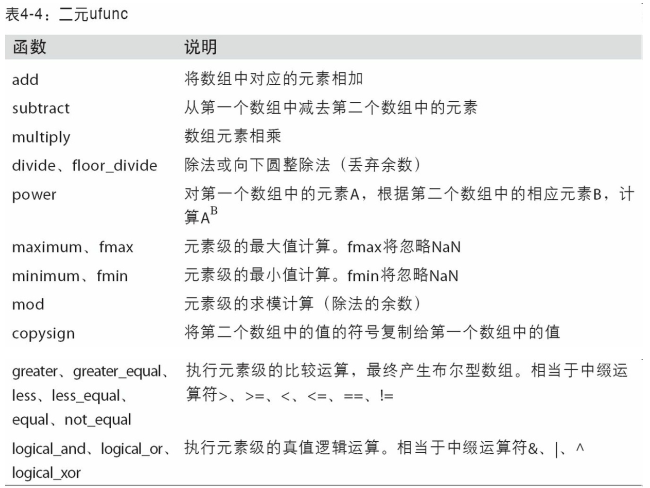
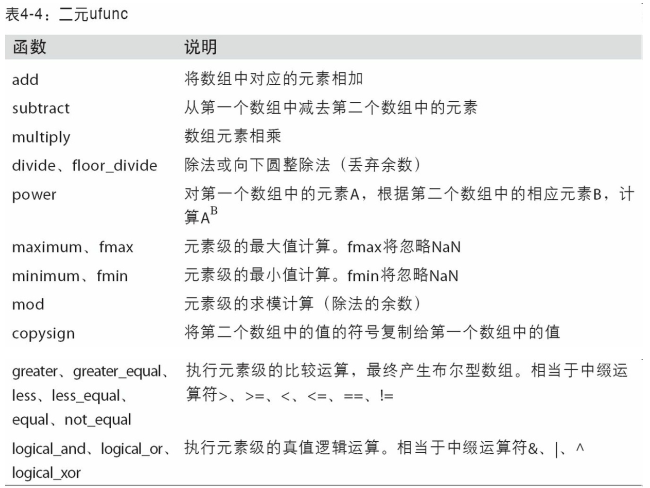

In [112]:
arr=np.arange(10)

In [117]:
s=np.sqrt(arr)
s

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [118]:
e=np.exp(arr)
e

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [119]:
np.maximum(s,e)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [121]:

#返回小数和整数部分
np.modf(s)

(array([0.        , 0.        , 0.41421356, 0.73205081, 0.        ,
        0.23606798, 0.44948974, 0.64575131, 0.82842712, 0.        ]),
 array([0., 1., 1., 1., 2., 2., 2., 2., 2., 3.]))